In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

Działanie SVM na danych nieznormalizowanych i po normalizacji. W pierwszym przypadku druga współrzędna jest w zdecydowanie większej skali niż pierwsza, co powoduje że granica decyzyjna będzie się do niej dopasowywać. W konsekwencji granica decyzyjna
może nie być wyznaczona optymalnie, nawet jeśli dane są liniowo separowalne. Po normalizacji granica decyzyjna jest dopasowana do obu współrzędnych.

In [12]:
from scipy import stats
n = 50
X =  np.vstack(( np.vstack( (stats.norm(-0.1,0.01).rvs(n), stats.norm(0,6).rvs(n)) ).T,
                     np.vstack( (stats.norm(0.1,0.01).rvs(n), stats.norm(15,6).rvs(n)) ).T ))
y =  np.hstack((np.repeat(0, 50),np.repeat(1, 50)) )

In [13]:
X.shape

(100, 2)

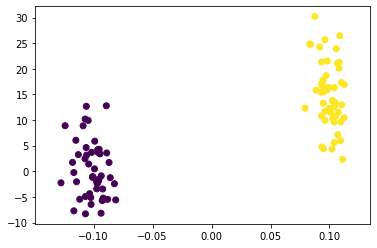

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, train_size=0.8) 

Uczymy model na danych bez skalowania.

In [16]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.85


In [17]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
#     plt.arrow(x_current, -w[0]/w[1] * x_current - b/w[1], w[0], w[1], head_width=0.1, head_length=0.1, ec="black", color="black", length_includes_head=True)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='gray')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

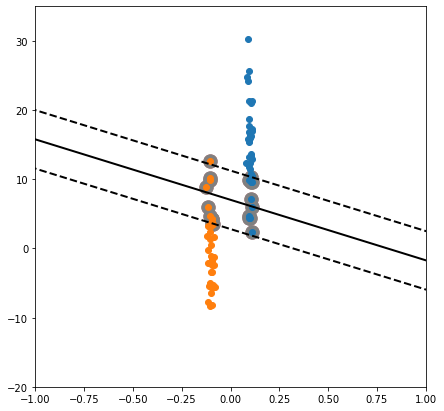

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "o")
plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "o")
plot_svc_decision_boundary(svm, -5, 5)
# plt.text(2, 2.3, r"wx-b=0", fontsize=17,rotation=48)
# plt.text(1., 3.6, r"wx-b=1", fontsize=17,rotation=48)
# plt.text(3, 0.9, r"wx-b=-1", fontsize=17,rotation=48)
# plt.text(0.3, 0.2, r"w", fontsize=17,rotation=48)
plt.xlim(-1, 1)
plt.ylim(-20, 35)
# plt.axis("equal")
plt.show()

Uczymy model na danych ze skalowania.

In [19]:
# preprocessing using 0-1 scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format( svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 1.00


NameError: name 'X_train_scaled' is not defined

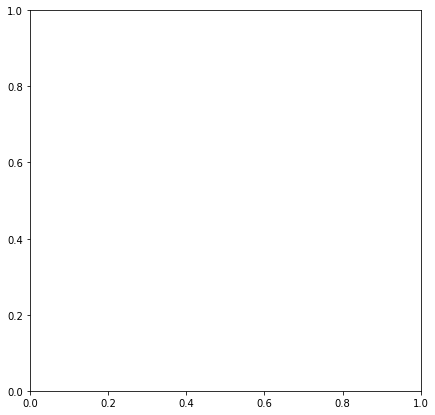

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
plt.plot(X_train_scaled[:, 0][y_train==1], X_train_scaled[:, 1][y_train==1], "o")
plt.plot(X_train_scaled[:, 0][y_train==0], X_train_scaled[:, 1][y_train==0], "o")
plot_svc_decision_boundary(svm, -5, 5)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()